# Tensorflow practival on convolutions, part 2, template matching

* This code uses 2D convolution for template matching. Given an image coins and a single coin template image, the matching cost is computed. The matching cost indicates how likely is it to find a coin in certain region of the image.
* Rescale the image by the factor of 4 (use function rescale, the example is given below) and see the result. Now the scale of the coin and the coins on the image are different therefore the matching is not as good as in the previos experiment. Now rescale the template and repeat the experiment. The purpose of this little exercise is to demonstrate is how important the scale is when trying to detect certain objects of features on the image.

In [66]:
import numpy as np
from scipy import misc
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from skimage.transform import rescale

import matplotlib.image as mpimg

img = mpimg.imread('Data/General/coins.png')

#img = rescale(img, 1.0 / 4.0)
img_gray = rgb2gray(img).astype('float32')

template = mpimg.imread('Data/General/coin_template.png')

template_gray = rgb2gray(template).astype('float32')

In [67]:
import tensorflow as tf

def tf_conv_2d(image, filt):
    # n_channels = 3
    # n_batch = 1
    
    # image, dimensions (height, width, n_channels)
    
    # image_batch, dimensions (n_batch, h, w, n_channels)
    image_batch = image[np.newaxis,:,:,np.newaxis]
    
    # filt, dimensions (filt_height, filt_width, n_input_channels, n_output_channels)
    # n_input_channels = 1
    # n_output_channels = 1
    filt = filt[:,:,np.newaxis,np.newaxis]

    conv_image = tf.nn.conv2d(input = image_batch, filter = filt, strides = [1, 1, 1, 1], padding = "SAME")
 
    with tf.Session() as sess:
        output_image = sess.run(conv_image)
        # output, dimensions (n_batch = 1, height, width, 1) 
        # one channel output (grayscale image)
        
        return output_image[0,:,:,0]

In [68]:
matching_cost = tf_conv_2d(img_gray, template_gray)

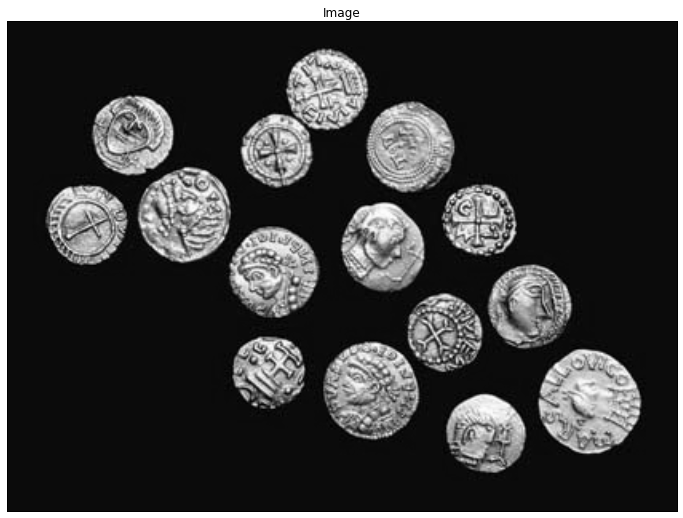

In [69]:
# plot of the image
plt.figure(figsize=(12, 9), dpi=80) # divide the size by four if rescaled
plt.title('Image')
imgplot = plt.imshow(img_gray, cmap = plt.get_cmap('gray'), clim=(0.0, 1.0))

imgplot.axes.get_xaxis().set_visible(False)
imgplot.axes.get_yaxis().set_visible(False)

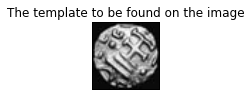

In [70]:
# plot of the template
plt.figure(figsize=(1.2, 1.9), dpi=80)
plt.title('The template to be found on the image')
imgplot = plt.imshow(template_gray, cmap = plt.get_cmap('gray'), clim=(0.0, 1.0))

imgplot.axes.get_xaxis().set_visible(False)
imgplot.axes.get_yaxis().set_visible(False)

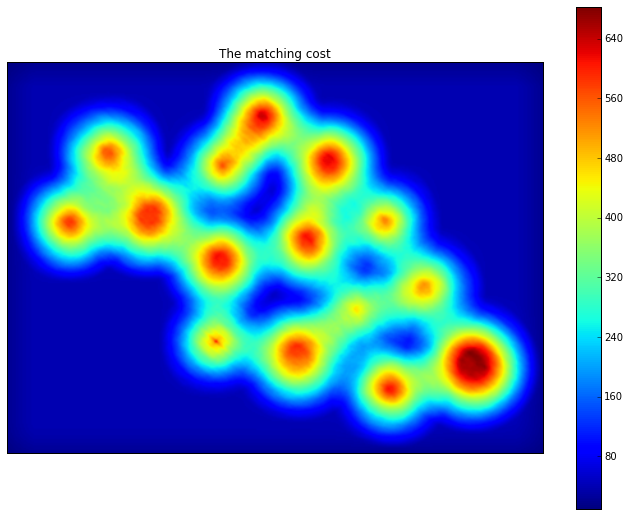

In [71]:
v_min = matching_cost.ravel().min()
v_max = matching_cost.ravel().max()

plt.figure(figsize=(12, 9), dpi=80)
plt.title('The matching cost')
imgplot = plt.imshow(matching_cost, cmap = plt.get_cmap('jet'), clim=(v_min, v_max))

cb = plt.colorbar(imgplot)

imgplot.axes.get_xaxis().set_visible(False)
imgplot.axes.get_yaxis().set_visible(False)